## **0 데이터 확인**

In [2]:
import pandas as pd
train=pd.read_csv('C:/Users/sshyu/Downloads/Aimers_data/train.csv').drop(columns=['ID'])
test=pd.read_csv("C:/Users/sshyu/Downloads/Aimers_data/test.csv").drop(columns=['ID'])
submission=pd.read_csv("C:/Users/sshyu/Downloads/Aimers_data/sample_submission.csv")

In [3]:
train.shape

(256351, 68)

In [4]:
train[train['시술 당시 나이']=='알 수 없음'].shape

(329, 68)

In [5]:
train[train['시술 당시 나이']=='알 수 없음']['임신 성공 여부'].mean()

0.0

In [6]:
train[train['시술 당시 나이']=='알 수 없음']['난자 출처'].value_counts()

난자 출처
본인 제공    329
Name: count, dtype: int64

In [7]:
train[train['시술 당시 나이']=='알 수 없음']['난자 기증자 나이'].value_counts()

난자 기증자 나이
알 수 없음    329
Name: count, dtype: int64

In [8]:
train.groupby('시술 당시 나이')['임신 성공 여부'].mean().sort_values(ascending=False)

시술 당시 나이
만18-34세    0.322622
만35-37세    0.278401
만38-39세    0.217138
만45-50세    0.167679
만40-42세    0.159393
만43-44세    0.118012
알 수 없음     0.000000
Name: 임신 성공 여부, dtype: float64

In [9]:
train[train['난자 출처']=='본인 제공'].groupby('시술 당시 나이')['임신 성공 여부'].mean()

시술 당시 나이
만18-34세    0.325815
만35-37세    0.280439
만38-39세    0.215694
만40-42세    0.145823
만43-44세    0.064107
만45-50세    0.028216
알 수 없음     0.000000
Name: 임신 성공 여부, dtype: float64

- 난자 출처가 본인 제공일 경우, 나이에 따라서 임신 성공 비율이 감소하는 형태임
- 알 수 없음 일 경우 0
 > 알 수 없음 일 경우 나이를 더 크게 잡아도 될 듯

In [10]:
train[train['난자 출처']=='알 수 없음'].groupby('시술 당시 나이')['임신 성공 여부'].mean()

시술 당시 나이
만18-34세    0.194592
만35-37세    0.151034
만38-39세    0.102564
만40-42세    0.069498
만43-44세    0.019093
만45-50세    0.003817
Name: 임신 성공 여부, dtype: float64

- 난자 출처가 알 수 없음일 경우 - 난자 기증자 나이도 알 수 없음.,
- 또한 시술 당시 나이 순으로 임신 성공 여부 평균이 감소함 monotone으로 -> 난자 출처가 알 수 없음 일 경우 본인 제공으로 봐도 된다고 생각함

In [11]:
train_age2=train[(train['난자 출처']!='기증 제공')][['시술 당시 나이','임신 성공 여부']]
train_age2.shape

(240582, 2)

In [12]:
train_age2['시술 당시 나이'].value_counts()

시술 당시 나이
만18-34세    99605
만35-37세    55911
만38-39세    37628
만40-42세    34076
만43-44세     9794
만45-50세     3239
알 수 없음       329
Name: count, dtype: int64

In [13]:
train_age2.loc[train_age2['시술 당시 나이']=='알 수 없음','시술 당시 나이']=47
train_age2.loc[train_age2['시술 당시 나이']=='만45-50세','시술 당시 나이']=45
train_age2.loc[train_age2['시술 당시 나이']=='만43-44세','시술 당시 나이']=43.5
train_age2.loc[train_age2['시술 당시 나이']=='만40-42세','시술 당시 나이']=41
train_age2.loc[train_age2['시술 당시 나이']=='만38-39세','시술 당시 나이']=38.5
train_age2.loc[train_age2['시술 당시 나이']=='만35-37세','시술 당시 나이']=36
train_age2.loc[train_age2['시술 당시 나이']=='만18-34세','시술 당시 나이']=34

In [14]:
train_age2.groupby('시술 당시 나이')['임신 성공 여부'].mean()

시술 당시 나이
34.0    0.323086
36.0    0.277083
38.5    0.212528
41.0    0.143503
43.5    0.062181
45.0    0.026243
47.0    0.000000
Name: 임신 성공 여부, dtype: float64

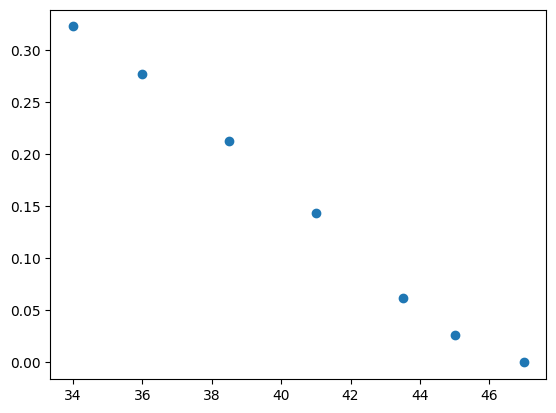

In [15]:
import matplotlib.pyplot as plt
plt.scatter(train_age2.groupby('시술 당시 나이')['임신 성공 여부'].mean().index,train_age2.groupby('시술 당시 나이')['임신 성공 여부'].mean().values)

In [16]:
train_age2.corr()

,시술 당시 나이,임신 성공 여부
시술 당시 나이,1.00000,-0.18309
임신 성공 여부,-0.18309,1.00000


원래라면, -0.18 정도의 correlation을 가져야 함 -> 이에 맞게 난자 출처가 기증제공인 경우 난자 기증자 나이와 시술 당시 나이를 가중합 한 보정된 나이 column을 만들어 임신 성공여부와 correlation이 저정도 되도록

In [17]:
train[train['시술 당시 나이']=='만45-50세']['난자 출처'].value_counts()

난자 출처
기증 제공     3679
본인 제공     2977
알 수 없음     262
Name: count, dtype: int64

In [18]:
train[(train['시술 당시 나이']=='만45-50세') & (train['난자 출처']=='기증 제공')]['난자 기증자 나이'].value_counts()

난자 기증자 나이
만31-35세    1487
만26-30세    1159
만21-25세     675
알 수 없음      268
만20세 이하      90
Name: count, dtype: int64

나이가 있으면, 난자 출처가 기증제공인 경우가 있어 train 전체 데이터에선 임신 성공 비율이 시술 당시 나이에 따라 감소하지 않음

In [19]:
train[(train['시술 당시 나이']=='만43-44세') & (train['난자 출처']=='기증 제공')]['난자 기증자 나이'].value_counts()

난자 기증자 나이
만31-35세    940
만26-30세    859
만21-25세    403
알 수 없음     211
만20세 이하     46
Name: count, dtype: int64

예를 들어 시술 당시 나이가 만 43-44세, 난자 출처가 기증 제공일 경우, 난자 기증자 나이 대부분이 시술 당시 나이보다 훨씬 어림

In [20]:
train[train['난자 출처']=='기증 제공'][['동결 배아 사용 여부','신선 배아 사용 여부','기증 배아 사용 여부']].mean()

동결 배아 사용 여부    0.312766
신선 배아 사용 여부    0.687108
기증 배아 사용 여부    0.155875
dtype: float64

In [21]:
train['배아 사용 여부']=train['동결 배아 사용 여부']+train['신선 배아 사용 여부']+train['기증 배아 사용 여부']

In [22]:
train[train['배아 사용 여부']==0]

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,...,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부,배아 사용 여부
27833,TRYBLT,만38-39세,NaN,IVF,ICSI:ICSI,1,기록되지 않은 시행,0.0,1.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,5.0,0,0.0
148884,TRXQMD,만35-37세,NaN,IVF,IVF,0,알 수 없음,0.0,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,6.0,5.0,0,0.0
179467,TRCMWS,만40-42세,NaN,IVF,Unknown,0,알 수 없음,1.0,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,4.0,0.0,1,0.0


In [23]:
train.groupby('난자 기증자 나이')['임신 성공 여부'].mean()

난자 기증자 나이
만20세 이하    0.261905
만21-25세    0.329906
만26-30세    0.348272
만31-35세    0.305215
알 수 없음     0.254579
Name: 임신 성공 여부, dtype: float64

난자 기증자 나이 별 임신 성공 여부를 살펴보면

26-30세 > 31-35세 > 21-25세 > 20세 이하 > 알 수 없음

### **특정 시술 유형- 주요 키워드 위주로 onehot encoding**

In [24]:
train['특정 시술 유형'].value_counts()

특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST                         1248
IVF:IVF                                  1146
ICSI:IVF                                  873
ICSI / AH                                 769
IVF:ICSI                                  392
IVF / AH                                  319
ICSI:Unknown                              207
IVF:Unknown                               100
ICI                                        96
Generic DI                                 71
IVI                                        23
ICSI / BLASTOCYST:IVF / BLASTOCYST          6
ICSI / BLASTOCYST :IVF / BLASTOCYST         4
FER                                         3
IVF / AH:ICSI / AH                          2
GIFT                     

FER 과 GIFT의 경우 test에 없음 -> 제외시키기

In [25]:
train=train[train['특정 시술 유형']!='GIFT']
train=train[train['특정 시술 유형']!='FER']

In [26]:
set(train['특정 시술 유형'].unique())-set(test['특정 시술 유형'].unique())

{'ICSI / AH:Unknown',
 'ICSI / BLASTOCYST :ICSI',
 'ICSI / BLASTOCYST :IVF / BLASTOCYST',
 'IVF / AH:ICSI / AH',
 nan}

In [27]:
# '특정 시술 유형' 열에 NaN 값이 있는 행을 삭제
train = train.dropna(subset=['특정 시술 유형'])

In [28]:
# 특정 시술 유형에서 ICSI: BLASTOCYST와 같은 경우에는 두가지 시술을 모두 다 했다는 의미로
# 주요 단어들로 column을 만들어서 해당 시술을 했으면 1, 아니면 0으로
# 특정 시술 유형에 대해 1 또는 0으로 표시할 칼럼 생성
categories = ['ICSI', 'IVF', 'IUI', 'BLASTOCYST', 'AH', 'Generic DI', 'IVI']
for category in categories:
    train[category] = train['특정 시술 유형'].str.contains(category).astype(int)

In [29]:
for category in categories:
    test[category] = test['특정 시술 유형'].str.contains(category).astype(int)

In [30]:
train[['ICSI', 'IVF', 'IUI', 'BLASTOCYST', 'AH', 'Generic DI', 'IVI']].describe()

,ICSI,IVF,IUI,BLASTOCYST,AH,Generic DI,IVI
count,256344.000000,256344.000000,256344.000000,256344.000000,256344.000000,256344.000000,256344.000000
mean,0.501463,0.373892,0.023796,0.011188,0.004260,0.000277,0.000090
std,0.499999,0.483836,0.152414,0.105181,0.065129,0.016640,0.009472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
train[train['특정 시술 유형']=='Unknown'][['ICSI', 'IVF', 'IUI', 'BLASTOCYST', 'AH', 'Generic DI', 'IVI']].sum()

ICSI          0
IVF           0
IUI           0
BLASTOCYST    0
AH            0
Generic DI    0
IVI           0
dtype: int64

In [34]:
train[(train['난자 출처']=='기증 제공')].groupby('시술 당시 나이')['IVF 시술 횟수'].value_counts()

시술 당시 나이  IVF 시술 횟수
만18-34세   0회           1190
          1회            683
          2회            448
          3회            284
          4회            131
          6회 이상          81
          5회             54
만35-37세   0회            505
          1회            440
          2회            344
          3회            232
          4회            148
          6회 이상         111
          5회             89
만38-39세   0회            392
          1회            344
          2회            297
          3회            223
          4회            144
          6회 이상         125
          5회             94
만40-42세   0회            713
          1회            626
          2회            574
          3회            459
          6회 이상         335
          4회            326
          5회            239
만43-44세   0회            591
          1회            517
          2회            413
          3회            307
          6회 이상         289
          4회            212
          5회            130


In [88]:
train_age=train[(train['난자 출처']=='기증 제공')][['시술 당시 나이','난자 기증자 나이','동결 배아 사용 여부','신선 배아 사용 여부','배아 이식 경과일','기증 배아 사용 여부','임신 성공 여부']]

In [89]:
train_age.isna().sum()

시술 당시 나이          0
난자 기증자 나이         0
동결 배아 사용 여부       0
신선 배아 사용 여부       0
배아 이식 경과일      1504
기증 배아 사용 여부       0
임신 성공 여부          0
dtype: int64

In [90]:
train_age['배아 이식 경과일'].fillna(0,inplace=True)

In [91]:
train_age['배아 이식 경과일'].value_counts()

배아 이식 경과일
0.0    5204
5.0    5160
3.0    3010
2.0    1445
1.0     519
4.0     323
6.0     101
7.0       7
Name: count, dtype: int64

In [92]:
train_age['시술 당시 나이'].value_counts()

시술 당시 나이
만45-50세    3679
만40-42세    3272
만18-34세    2871
만43-44세    2459
만35-37세    1869
만38-39세    1619
Name: count, dtype: int64

In [157]:
train_age.head()

,시술 당시 나이,난자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,배아 이식 경과일,기증 배아 사용 여부,임신 성공 여부
6,34.0,만21-25세,0.0,1.0,2.0,0.0,0
22,41.0,만21-25세,0.0,1.0,4.0,0.0,1
40,34.0,만31-35세,1.0,0.0,0.0,1.0,0
79,45.0,만26-30세,0.0,1.0,0.0,0.0,0
100,34.0,만26-30세,1.0,0.0,0.0,0.0,0


In [94]:
train_age['시술 당시 나이'].value_counts()

시술 당시 나이
만45-50세    3679
만40-42세    3272
만18-34세    2871
만43-44세    2459
만35-37세    1869
만38-39세    1619
Name: count, dtype: int64

In [158]:
train_age.loc[train_age['시술 당시 나이']=='만45-50세','시술 당시 나이']=45
train_age.loc[train_age['시술 당시 나이']=='만43-44세','시술 당시 나이']=43.5
train_age.loc[train_age['시술 당시 나이']=='만40-42세','시술 당시 나이']=41
train_age.loc[train_age['시술 당시 나이']=='만38-39세','시술 당시 나이']=38.5
train_age.loc[train_age['시술 당시 나이']=='만35-37세','시술 당시 나이']=36
train_age.loc[train_age['시술 당시 나이']=='만18-34세','시술 당시 나이']=34

In [159]:
train_age['시술 당시 나이']=train_age['시술 당시 나이'].astype('float')

In [160]:
train_age['시술 당시 나이'].value_counts()

시술 당시 나이
45.0    3679
41.0    3272
34.0    2871
43.5    2459
36.0    1869
38.5    1619
Name: count, dtype: int64

In [172]:
train_age['난자 기증자 나이'].value_counts()

난자 기증자 나이
만31-35세    6366
만26-30세    4976
만21-25세    2334
만20세 이하     294
Name: count, dtype: int64

In [162]:
train.groupby('난자 기증자 나이')['임신 성공 여부'].mean().sort_values()

난자 기증자 나이
알 수 없음     0.254582
만20세 이하    0.261905
만31-35세    0.305215
만21-25세    0.329906
만26-30세    0.348272
Name: 임신 성공 여부, dtype: float64

- 난자 기증자 나이와 임신 성공 여부의 평균이 monotone 하게 증가/감소하지 않음
- 임신 성공 여부는 시술 당시 나이가 가장 중요한 변수이고, 난자 기증자 나이는 부가적인 요소임

In [163]:
test['난자 기증자 나이'].value_counts()

난자 기증자 나이
알 수 없음     85173
만31-35세     2289
만26-30세     1669
만21-25세      817
만20세 이하      119
Name: count, dtype: int64

In [167]:
train_age=train_age[train_age['난자 기증자 나이']!='알 수 없음']

In [173]:
train_age.loc[train_age['난자 기증자 나이']=='만20세 이하','난자 기증자 나이']=20
train_age.loc[train_age['난자 기증자 나이']=='만21-25세','난자 기증자 나이']=23
train_age.loc[train_age['난자 기증자 나이']=='만26-30세','난자 기증자 나이']=28
train_age.loc[train_age['난자 기증자 나이']=='만31-35세','난자 기증자 나이']=33

In [174]:
train_age['난자 기증자 나이']=train_age['난자 기증자 나이'].astype('float')
train_age['난자 기증자 나이'].value_counts()

난자 기증자 나이
33.0    6366
28.0    4976
23.0    2334
20.0     294
Name: count, dtype: int64

In [175]:
train_age

,시술 당시 나이,난자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,배아 이식 경과일,기증 배아 사용 여부,임신 성공 여부
6,34.0,23.0,0.0,1.0,2.0,0.0,0
22,41.0,23.0,0.0,1.0,4.0,0.0,1
40,34.0,33.0,1.0,0.0,0.0,1.0,0
79,45.0,28.0,0.0,1.0,0.0,0.0,0
100,34.0,28.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
256295,43.5,23.0,0.0,1.0,0.0,0.0,0
256306,38.5,28.0,1.0,0.0,0.0,0.0,1
256315,45.0,28.0,0.0,1.0,5.0,0.0,1
256329,38.5,33.0,1.0,0.0,0.0,0.0,0


In [176]:
train_age['배아 이식 경과일']

6         2.0
22        4.0
40        0.0
79        0.0
100       0.0
         ... 
256295    0.0
256306    0.0
256315    5.0
256329    0.0
256334    5.0
Name: 배아 이식 경과일, Length: 13970, dtype: float64

In [177]:
train_age.corr()['임신 성공 여부']

시술 당시 나이      -0.007279
난자 기증자 나이     -0.020211
동결 배아 사용 여부   -0.093186
신선 배아 사용 여부    0.093288
배아 이식 경과일      0.233041
기증 배아 사용 여부    0.022064
임신 성공 여부       1.000000
Name: 임신 성공 여부, dtype: float64

In [178]:
import warnings
import pandas as pd

# SettingWithCopyWarning 무시
warnings.simplefilter(action='ignore')

In [148]:
import numpy as np
from scipy.optimize import minimize

# 보정된 나이 가중치 최적화
def calculate_adjusted_age(a_values):
    adjusted_age = np.zeros(len(train_age3))
    
    # 각 시술 방법에 대해 다른 배아 이식 경과일 가중치 b (최적화되는 값)
    b_frozen = a_values[3]  # 동결 배아에 대한 가중치
    b_fresh = a_values[4]  # 신선 배아에 대한 가중치
    b_donor = a_values[5]  # 기증 배아에 대한 가중치

    for i, method in enumerate(['동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부']):
        method_data = train_age3[method] == 1  # 해당 시술 방법이 1인 행을 찾기
        adjusted_age[method_data] = train_age3.loc[method_data, '시술 당시 나이'] * a_values[i] + train_age3.loc[method_data, '난자 기증자 나이'] * (1 - a_values[i])

    # 배아 이식 경과일에 대한 가중치 적용 (조건에 맞는 행들에만 적용)
    adjusted_age[train_age3['동결 배아 사용 여부'] == 1] += b_frozen * train_age3[train_age3['동결 배아 사용 여부'] == 1]['배아 이식 경과일'] 
    adjusted_age[train_age3['신선 배아 사용 여부'] == 1] += b_fresh * train_age3[train_age3['신선 배아 사용 여부'] == 1]['배아 이식 경과일'] 
    adjusted_age[train_age3['기증 배아 사용 여부'] == 1] += b_donor * train_age3[train_age3['기증 배아 사용 여부'] == 1]['배아 이식 경과일'] 
    
    # 보정된 나이 계산 후 상관계수 계산
    train_age3['보정된 나이'] = adjusted_age
    return train_age3[['보정된 나이', '임신 성공 여부']].corr().iloc[0, 1]  # 상관계수 반환

# 목적 함수: 상관계수  최소화
def objective(a_values):
    return calculate_adjusted_age(a_values)

# 초기 값 (각 시술 방법에 대한 가중치와 배아 이식 경과일에 대한 가중치 b 초기값 설정)
initial_a_values = [0.5] * 3 + [0.0] * 3  # 3개의 시술 방법에 대한 초기값과 배아 이식 경과일에 대한 가중치 0 설정

# a의 범위: 0에서 1 사이, b의 범위: -1에서 1 사이
bounds = [(0, 1)] * 3 + [(-1, 1)] * 3  # 각 시술 방법과 배아 이식 경과일에 대한 가중치는 각각 범위 설정

# 최적화 수행
result = minimize(objective, initial_a_values, bounds=bounds)

In [149]:
# 최적의 a 값과 b 값 출력
optimal_a_values = result.x[:3]  # 시술 방법에 대한 최적의 a 값
optimal_b_values = result.x[3:]  # 배아 이식 경과일에 대한 최적의 b 값
result.x

array([ 0.52030161,  0.3935277 ,  0.50884084, -0.8335926 , -1.        ,
       -1.        ])

In [150]:
train_age3[train_age3['동결 배아 사용 여부'] == 1]['배아 이식 경과일'] 

40        0.0
100       0.0
129       0.0
230       0.0
284       0.0
         ... 
256043    1.0
256063    0.0
256114    0.0
256306    0.0
256329    0.0
Name: 배아 이식 경과일, Length: 4057, dtype: float64

In [151]:
result.x[:3] 

array([0.52030161, 0.3935277 , 0.50884084])

In [152]:
# 최적의 a 값과 b 값으로 보정된 나이 계산
train_age3['보정된 나이'] = train_age3['시술 당시 나이']  # 초기화
for i in range(3):
    method_data = train_age3[['동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부']].iloc[:, i] == 1
    train_age3.loc[method_data, '보정된 나이'] = train_age3.loc[method_data, '시술 당시 나이'] * optimal_a_values[i] + train_age3.loc[method_data, '난자 기증자 나이'] * (1 - optimal_a_values[i])

In [153]:
# 배아 이식 경과일에 대한 보정된 나이 추가
train_age3[train_age3['동결 배아 사용 여부'] == 1]['보정된 나이'] += optimal_b_values[0] * train_age3[train_age3['동결 배아 사용 여부'] == 1]['배아 이식 경과일'] 
train_age3[train_age3['신선 배아 사용 여부'] == 1]['보정된 나이'] += optimal_b_values[1] * train_age3[train_age3['신선 배아 사용 여부'] == 1]['배아 이식 경과일'] 
train_age3[train_age3['기증 배아 사용 여부'] == 1]['보정된 나이'] += optimal_b_values[2] * train_age3[train_age3['기증 배아 사용 여부'] == 1]['배아 이식 경과일'] 

In [154]:
optimal_b_values[0]

-0.8335926046647236

In [155]:
train_age3['보정된 나이']

6         27.328805
22        30.083499
40        33.508841
79        34.689971
100       31.121810
            ...    
256295    31.067318
256306    33.463167
256315    34.689971
256329    35.861659
256334    27.328805
Name: 보정된 나이, Length: 13970, dtype: float64

In [156]:
train_age3.corr()['임신 성공 여부']

시술 당시 나이      -0.007279
난자 기증자 나이     -0.020211
동결 배아 사용 여부   -0.093186
신선 배아 사용 여부    0.093288
배아 이식 경과일      0.233041
기증 배아 사용 여부    0.022064
임신 성공 여부       1.000000
보정된 나이        -0.037030
Name: 임신 성공 여부, dtype: float64

In [84]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
# 보정된 나이 가중치 최적화
def calculate_adjusted_age(a_values):
    adjusted_age = np.zeros(len(train_age3))
    
    # IVF 시술 횟수에 대한 가중치 b (최적화되는 값)
    b = a_values[-1]  # 마지막 값이 IVF 시술 횟수에 대한 가중치

    for i, method in enumerate(['동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부']):
        method_data = train_age3[method] == 1  # 해당 시술 방법이 1인 행을 찾기
        adjusted_age[method_data] = train_age3.loc[method_data, '시술 당시 나이'] * a_values[i] + train_age3.loc[method_data, '난자 기증자 나이'] * (1 - a_values[i])

    # IVF 시술 횟수에 대한 보정된 나이 추가
    adjusted_age += b * train_age3['IVF 시술 횟수']/6
    
    # 보정된 나이 계산 후 상관계수 계산
    train_age3['보정된 나이'] = adjusted_age
    return train_age3[['보정된 나이', '임신 성공 여부']].corr().iloc[0, 1]  # 상관계수 반환

# 목적 함수: 상관계수의 절댓값을 최소화
def objective(a_values):
    corr_value = calculate_adjusted_age(a_values)
    return abs(corr_value + 1)  # 상관계수와 -1의 차이를 최소화

# 초기 값 (각 시술 방법에 대한 가중치와 IVF 시술 횟수에 대한 b 초기값 설정)
initial_a_values = [0.5] * 3 + [0.0]  # 3개의 시술 방법에 대한 초기값과 IVF 시술 횟수에 대한 초기값 0 설정

# a의 범위: 0에서 1 사이, b의 범위: -1에서 1 사이
bounds = [(0, 1)] * 3 + [(-1, 1)]  # IVF 시술 횟수에 대한 가중치는 -1에서 1 사이로 제한

# 최적화 수행
result = minimize(objective, initial_a_values, bounds=bounds)

In [85]:
# 최적의 a 값과 b 값 출력
optimal_a_values = result.x[:-1]
optimal_b_value = result.x[-1]

print(f'최적의 a 값: {optimal_a_values}')
print(f'IVF 시술 횟수에 대한 최적의 b 값: {optimal_b_value:.4f}')

최적의 a 값: [1.         0.         0.03895044]
IVF 시술 횟수에 대한 최적의 b 값: 1.0000


In [86]:
# 최적의 a 값과 b 값으로 보정된 나이 계산
train_age3['보정된 나이'] = train_age3['시술 당시 나이'] # 초기화
for i in range(3):
    method_data = train_age3[['동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부']].iloc[:, i] == 1
    train_age3.loc[method_data, '보정된 나이'] = train_age3.loc[method_data, '시술 당시 나이'] * optimal_a_values[i] + train_age3.loc[method_data, '난자 기증자 나이'] * (1 - optimal_a_values[i])

In [87]:
train_age3.corr()['임신 성공 여부']

시술 당시 나이      -0.007279
난자 기증자 나이     -0.020211
동결 배아 사용 여부   -0.093186
신선 배아 사용 여부    0.093288
IVF 시술 횟수     -0.037936
기증 배아 사용 여부    0.022064
임신 성공 여부       1.000000
보정된 나이        -0.079558
Name: 임신 성공 여부, dtype: float64

In [241]:
train_age[['동결 배아 사용 여부','신선 배아 사용 여부','기증 배아 사용 여부']].mean()

동결 배아 사용 여부    0.290408
신선 배아 사용 여부    0.709520
기증 배아 사용 여부    0.140157
dtype: float64

In [252]:
import numpy as np
from scipy.optimize import minimize
# 보정된 나이 가중치 최적화
def calculate_adjusted_age(a_values):
    adjusted_age = np.zeros(len(train_age))
    
    for i, method in enumerate(['동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부']):
        method_data = train_age[method] == 1  # 해당 시술 방법이 1인 행을 찾기
        adjusted_age[method_data] = train_age.loc[method_data, '시술 당시 나이'] * a_values[i] + train_age.loc[method_data, '난자 기증자 나이'] * (1 - a_values[i])
    
    # 보정된 나이 계산 후 상관계수 계산
    train_age['보정된 나이'] = adjusted_age
    return train_age[['보정된 나이', '임신 성공 여부']].corr().iloc[0, 1]  # 상관계수 반환
# 목적 함수: 상관계수의 절댓값을 최소화
def objective(a_values):
    corr_value=calculate_adjusted_age(a_values)
    return abs(corr_value+1)

initial_a_values = [0.5] * 3
bounds = [(0.3, 1)] * 3
result = minimize(objective, initial_a_values, bounds=bounds)

In [253]:
# 최적의 a 값
optimal_a_values = result.x

In [254]:
result.x

array([1. , 0.3, 0.3])

In [255]:
# 최적의 a 값으로 보정된 나이 계산
train_age['보정된 나이'] = train_age['시술 당시 나이']  # 초기화
for i, method in enumerate(['동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부']):
    method_data = train_age[method] == 1  # 해당 시술 방법이 1인 행을 찾기
    train_age.loc[method_data, '보정된 나이'] = train_age.loc[method_data, '시술 당시 나이'] * optimal_a_values[i] + train_age.loc[method_data, '난자 기증자 나이'] * (1 - optimal_a_values[i])

In [256]:
train_age[['보정된 나이', '임신 성공 여부']].corr().iloc[0, 1]  

-0.07605938983320726

In [257]:
train_age['보정된 나이2']=train_age['보정된 나이'].round(0)

In [258]:
train_age[['보정된 나이2', '임신 성공 여부']].corr().iloc[0, 1]  

-0.07564866539393775

In [259]:
train_age[train_age['보정된 나이2']<30].describe()

,시술 당시 나이,난자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,배아 이식 경과일,기증 배아 사용 여부,임신 성공 여부,보정된 나이,보정된 나이2
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,39.694102,22.534979,0.053498,0.946502,3.406036,0.148834,0.349108,27.682716,27.556927
std,3.561555,1.086106,0.225101,0.225101,1.885469,0.356047,0.476852,1.185034,1.159182
min,34.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,24.000000
25%,36.000000,23.000000,0.000000,1.000000,2.000000,0.000000,0.000000,26.900000,27.000000
50%,41.000000,23.000000,0.000000,1.000000,4.000000,0.000000,0.000000,27.650000,28.000000
75%,43.500000,23.000000,0.000000,1.000000,5.000000,0.000000,1.000000,28.400000,28.000000
max,45.000000,23.000000,1.000000,1.000000,7.000000,1.000000,1.000000,29.150000,29.000000


In [260]:
train_age[train_age['보정된 나이2']<30]['난자 기증자 나이'].value_counts()

난자 기증자 나이
23.0    1232
20.0     226
Name: count, dtype: int64

In [261]:
result.x

array([1. , 0.3, 0.3])

In [266]:
train_age.corr()['임신 성공 여부'].sort_values()

동결 배아 사용 여부   -0.093186
보정된 나이        -0.076059
보정된 나이2       -0.075649
난자 기증자 나이     -0.020211
시술 당시 나이      -0.007279
기증 배아 사용 여부    0.022064
신선 배아 사용 여부    0.093288
배아 이식 경과일      0.233041
임신 성공 여부       1.000000
Name: 임신 성공 여부, dtype: float64

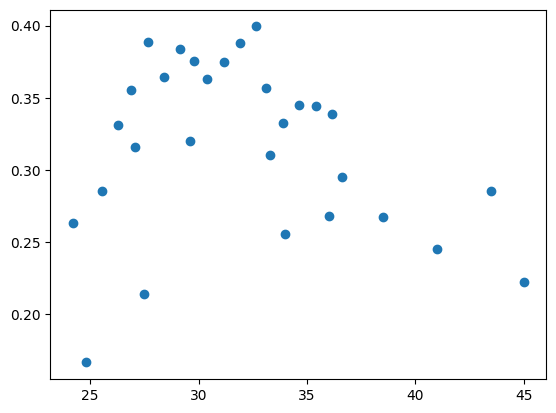

In [267]:
import matplotlib.pyplot as plt
plt.scatter(train_age.groupby('보정된 나이')['임신 성공 여부'].mean().index,train_age.groupby('보정된 나이')['임신 성공 여부'].mean().values)

In [238]:
train_age['기증 배아 사용 여부'].mean()

0.14015748031496064

In [277]:
train_age.shape

(13970, 9)

In [278]:
train_age['임신 성공 여부'].mean()

0.32376521116678597

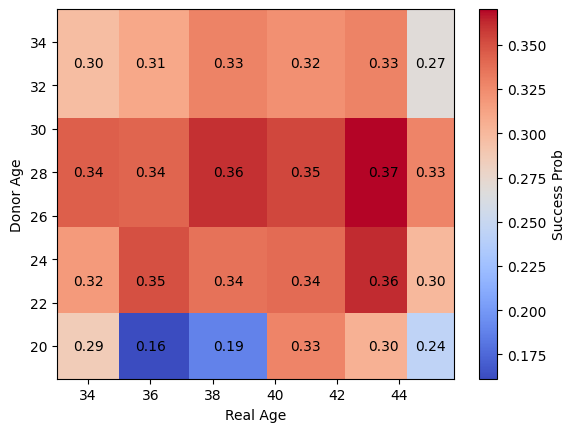

In [302]:
train_age_ndon=train_age[train_age['기증 배아 사용 여부']!=1]
x_bins = np.unique(train_age['시술 당시 나이'])  # 시술 당시 나이의 고유값
y_bins = np.unique(train_age['난자 기증자 나이'])  # 난자 기증자 나이의 고유값

# 그리드 크기 설정
heatmap_data = np.zeros((len(x_bins), len(y_bins)))

# 각 그리드 구간에 대해 임신 성공 여부 평균 계산
for i, x_val in enumerate(x_bins):
    for j, y_val in enumerate(y_bins):
        # 각 구간에 해당하는 데이터 필터링
        condition = (train_age['시술 당시 나이'] == x_val) & (train_age['난자 기증자 나이'] == y_val)
        # 해당 구간에 대한 임신 성공 여부의 평균 계산
        heatmap_data[i, j] = train_age.loc[condition, '임신 성공 여부'].mean()

c = plt.pcolormesh(x_bins, y_bins, heatmap_data.T, cmap='coolwarm', shading='auto')
plt.colorbar(c, label='Success Prob')

# 각 그리드에 값 표시
for i, x_val in enumerate(x_bins):
    for j, y_val in enumerate(y_bins):
        plt.text(x_val, y_val, f'{heatmap_data[i, j]:.2f}', ha='center', va='center', color='black')
plt.xlabel('Real Age')
plt.ylabel('Donor Age')
plt.show()

**시술 당시 나이, 난자 기증자 나이별 임신 성공 확률**

[Real Age 34세의 경우] - 28>23>33>20

[Real Age 36세의 경우] - 23>28>33>20

[Real Age 38세의 경우] - 28>23>33>20

[Real Age 41세의 경우] - 28>23>20>33

[Real Age 43세의 경우] - 28>23>33>20

[Real Age 45세의 경우] - 28>23>33>20


이때 보이는 경향성은, 나이가 23,28일 때 임신 성공 비율이 높고, 오히려 나이가 너무 낮으면 임신 성공 비율이 떨어짐. 

실제로 찾아보면, 가장 적합한 Egg Donor Age가 20세초- 30세초라서 그런 것 같음 (여기서 Donor Age가 20인건, 데이터 명세서에 따르면 만 20세 이하, 따라서 너무 Donor Age가 낮아도 좋지 않은 것 같음)

따라서 Egg Donor Age가 23,28세일 때 / 33, 20세일 때를 각각 나눠서 해야 할 것

In [312]:
train[train['난자 출처']!='기증 제공'].groupby('시술 당시 나이')['임신 성공 여부'].mean()

시술 당시 나이
만18-34세    0.323096
만35-37세    0.277080
만38-39세    0.212528
만40-42세    0.143507
만43-44세    0.062181
만45-50세    0.026243
알 수 없음     0.000000
Name: 임신 성공 여부, dtype: float64

In [322]:
train[train['난자 출처']=='기증 제공']['시술 당시 나이'].value_counts()

시술 당시 나이
만45-50세    3679
만40-42세    3272
만18-34세    2871
만43-44세    2459
만35-37세    1869
만38-39세    1619
Name: count, dtype: int64

In [343]:
age_table=pd.concat([train[train['난자 출처']=='본인 제공'].groupby('시술 당시 나이')['임신 성공 여부'].mean(),
            train[train['난자 출처']=='알 수 없음'].groupby('시술 당시 나이')['임신 성공 여부'].mean(),
          ],axis=1)
age_table.columns=['본인 제공','출처 알 수 없음']
train_age4=train[train['난자 출처']=='기증 제공']
age_table2=train_age4.pivot_table(values='임신 성공 여부', index='시술 당시 나이',columns='난자 기증자 나이',aggfunc='mean')
age_result=pd.concat([age_table,age_table2],axis=1)
age_result

,본인 제공,출처 알 수 없음,만20세 이하,만21-25세,만26-30세,만31-35세,알 수 없음
시술 당시 나이,,,,,,,
만18-34세,0.325825,0.194592,0.285714,0.317460,0.344639,0.297089,0.246637
만35-37세,0.280436,0.151034,0.161290,0.350230,0.341651,0.310345,0.288194
만38-39세,0.215694,0.102564,0.187500,0.336449,0.360721,0.328616,0.243697
만40-42세,0.145823,0.069565,0.328358,0.339216,0.353516,0.322751,0.227011
만43-44세,0.064107,0.019093,0.304348,0.362283,0.370198,0.328723,0.236967
만45-50세,0.028216,0.003817,0.244444,0.300741,0.327869,0.268325,0.264925
알 수 없음,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


**난자 기증자 나이가 만 21-25세, 만 26-30세 인 경우,  시술 당시 나이가 만 18-34세와 비슷한 임신 성공 확률을 보임**

In [389]:
train['보정된 나이']=50.0 # 시술 당시 나이가 알 수 없음 일 경우
train.loc[train['시술 당시 나이']=='만18-34세','보정된 나이']=30.0
train.loc[train['시술 당시 나이']=='만35-37세','보정된 나이']=36.0
train.loc[train['시술 당시 나이']=='만38-39세','보정된 나이']=38.5
train.loc[train['시술 당시 나이']=='만40-42세','보정된 나이']=41.0
train.loc[train['시술 당시 나이']=='만43-44세','보정된 나이']=43.5
train.loc[train['시술 당시 나이']=='만45-50세','보정된 나이']=47.5

In [483]:
test['보정된 나이']=50.0 # 시술 당시 나이가 알 수 없음 일 경우
test.loc[test['시술 당시 나이']=='만18-34세','보정된 나이']=30.0
test.loc[test['시술 당시 나이']=='만35-37세','보정된 나이']=36.0
test.loc[test['시술 당시 나이']=='만38-39세','보정된 나이']=38.5
test.loc[test['시술 당시 나이']=='만40-42세','보정된 나이']=41.0
test.loc[test['시술 당시 나이']=='만43-44세','보정된 나이']=43.5
test.loc[test['시술 당시 나이']=='만45-50세','보정된 나이']=47.5

In [486]:
test['보정된 나이']=test['보정된 나이'].astype(float)

In [399]:
train[train['난자 출처'] == '본인 제공'].groupby('보정된 나이')['임신 성공 여부'].mean()

보정된 나이
30.0    0.325825
36.0    0.280436
38.5    0.215694
41.0    0.145823
43.5    0.064107
47.5    0.028216
50.0    0.000000
Name: 임신 성공 여부, dtype: float64

In [412]:
train['난자 출처'].value_counts()

난자 출처
본인 제공    234285
기증 제공     15769
출처 모름      6290
Name: count, dtype: int64

In [433]:
train[train['난자 출처'] == '기증 제공'].groupby(['보정된 나이', '난자 기증자 나이'])['임신 성공 여부'].mean().unstack()

난자 기증자 나이,만20세 이하,만21-25세,만26-30세,만31-35세,알 수 없음
보정된 나이,,,,,
30.0,0.285714,0.317460,0.344639,0.297089,0.246637
36.0,0.161290,0.350230,0.341651,0.310345,0.288194
38.5,0.187500,0.336449,0.360721,0.328616,0.243697
41.0,0.328358,0.339216,0.353516,0.322751,0.227011
43.5,0.304348,0.362283,0.370198,0.328723,0.236967
47.5,0.244444,0.300741,0.327869,0.268325,0.264925


In [438]:
# 본인 제공의 시술 당시 나이별 임신 성공 여부 평균 계산
mean_success_bonin = train[train['난자 출처'] == '본인 제공'].groupby('보정된 나이')['임신 성공 여부'].mean()

# 난자 기증자 나이별 임신 성공 여부 평균 계산
mean_success_donor = pd.concat([train[train['난자 출처'] == '기증 제공'].groupby(['보정된 나이', '난자 기증자 나이'])['임신 성공 여부'].mean().unstack(),
                               train[train['난자 출처'] == '출처 모름'].groupby('보정된 나이')['임신 성공 여부'].mean()],axis=1)

In [443]:
mean_success_donor.columns=['만20세 이하', '만21-25세', '만26-30세', '만31-35세', '기증나 나이 모름', '출처 모름']

In [444]:
mean_success_donor

,만20세 이하,만21-25세,만26-30세,만31-35세,기증나 나이 모름,출처 모름
보정된 나이,,,,,,
30.0,0.285714,0.317460,0.344639,0.297089,0.246637,0.194592
36.0,0.161290,0.350230,0.341651,0.310345,0.288194,0.151034
38.5,0.187500,0.336449,0.360721,0.328616,0.243697,0.102564
41.0,0.328358,0.339216,0.353516,0.322751,0.227011,0.069565
43.5,0.304348,0.362283,0.370198,0.328723,0.236967,0.019093
47.5,0.244444,0.300741,0.327869,0.268325,0.264925,0.003817


In [468]:
mean_success_bonin

보정된 나이
30.0    0.325825
36.0    0.280436
38.5    0.215694
41.0    0.145823
43.5    0.064107
47.5    0.028216
50.0    0.000000
Name: 임신 성공 여부, dtype: float64

In [467]:
min(mean_success_bonin.index, key=lambda x: abs(mean_success_bonin[x] - 0.244444))

38.5

In [470]:
train['난자 기증자 나이'].value_counts()

난자 기증자 나이
알 수 없음     242374
만31-35세      6366
만26-30세      4976
만21-25세      2334
만20세 이하       294
Name: count, dtype: int64

In [471]:
# 난자 출처가 기증 제공일 경우 시술 당시 나이 보정 함수
def adjust_age(row, mean_success_bonin):
    if row['난자 출처'] != '본인 제공':
        # 난자 기증자 나이별 임신 성공 여부 평균값 계산
        donor_avg_success = train[(train['난자 기증자 나이'] == row['난자 기증자 나이']) & 
                                      (train['보정된 나이'] == row['보정된 나이'])]['임신 성공 여부'].mean()
        
        # 본인 제공의 시술 당시 나이로 보정된 시술 당시 나이를 찾음
        closest_age = min(mean_success_bonin.index, key=lambda x: abs(mean_success_bonin[x] - donor_avg_success))
        
        # 기증 제공에서 보정된 시술 당시 나이를 본인 제공과의 확률 차이를 반영해 계산
        adjustment = donor_avg_success - mean_success_bonin[closest_age]
        return closest_age + adjustment
    else:
        # 본인 제공일 경우 시술 당시 나이는 그대로 유지
        return row['보정된 나이']
# 보정된 시술 당시 나이 계산
train['보정된 나이'] = train.apply(adjust_age, axis=1, mean_success_bonin=mean_success_bonin)

In [472]:
train['보정된 나이'].isna().sum()

0

In [487]:
train['보정된 나이']=train['보정된 나이'].astype(float)

In [488]:
# test 데이터에서도 마찬가지로 
test['보정된 나이'] = test.apply(adjust_age, axis=1, mean_success_bonin=mean_success_bonin)

(array([35317.,     0.,     0., 19641., 13091., 12319.,  3458.,     0.,
         1231.,   116.]),
 array([30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.]),
 <BarContainer object of 10 artists>)

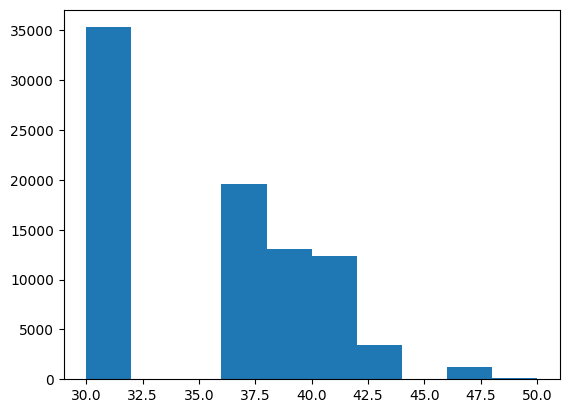

In [502]:
plt.hist(test['보정된 나이'])

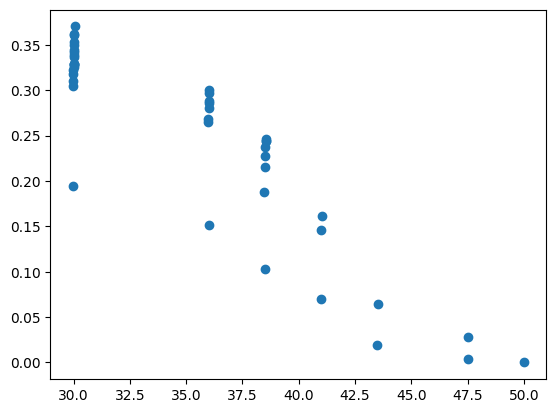

In [497]:
plt.scatter(train.groupby('보정된 나이')['임신 성공 여부'].mean().index,train.groupby('보정된 나이')['임신 성공 여부'].mean().values)

In [498]:
train[['보정된 나이','임신 성공 여부']].corr()

,보정된 나이,임신 성공 여부
보정된 나이,1.000000,-0.172093
임신 성공 여부,-0.172093,1.000000


굉장히 낮은 correaltion을 보임  !!

but 이때 그럼 test에서는 임신 성공 여부 확률을 알 수 없는데 어떻게 해야할지.. 난감함

### **난자 출처/난자 기증자 나이 -> 난자 기증 새로운 column 생성**

In [505]:
train['난자 기증자 나이'].value_counts()

난자 기증자 나이
알 수 없음     242374
만31-35세      6366
만26-30세      4976
만21-25세      2334
만20세 이하       294
Name: count, dtype: int64

In [511]:
train[(train['난자 기증자 나이']=='알 수 없음')&(train['난자 출처']=='기증 제공')].groupby('시술 당시 나이')['임신 성공 여부'].mean()

시술 당시 나이
만18-34세    0.246637
만35-37세    0.288194
만38-39세    0.243697
만40-42세    0.227011
만43-44세    0.236967
만45-50세    0.264925
Name: 임신 성공 여부, dtype: float64

In [512]:
train['난자 출처'].value_counts()

난자 출처
본인 제공    234285
기증 제공     15769
출처 모름      6290
Name: count, dtype: int64

In [521]:
train.loc[train['난자 출처']=='본인 제공','난자 기증']=0
train.loc[(train['난자 출처']=='기증 제공')&(train['난자 기증자 나이']=='만21-25세'),'난자 기증']=1
train.loc[(train['난자 출처']=='기증 제공')&(train['난자 기증자 나이']=='만26-30세'),'난자 기증']=1
train.loc[(train['난자 출처']=='기증 제공')&(train['난자 기증자 나이']=='만20세 이하'),'난자 기증']=0.5
train.loc[(train['난자 출처']=='기증 제공')&(train['난자 기증자 나이']=='만31-35세'),'난자 기증']=0.5
train.loc[(train['난자 출처']=='기증 제공')&(train['난자 기증자 나이']=='알 수 없음'),'난자 기증']=0.5
train.loc[(train['난자 출처']=='출처 모름'),'난자 기증']=-1

In [528]:
test.loc[test['난자 출처']=='본인 제공','난자 기증']=0
test.loc[(test['난자 출처']=='기증 제공')&(test['난자 기증자 나이']=='만21-25세'),'난자 기증']=1
test.loc[(test['난자 출처']=='기증 제공')&(test['난자 기증자 나이']=='만26-30세'),'난자 기증']=1
test.loc[(test['난자 출처']=='기증 제공')&(test['난자 기증자 나이']=='만20세 이하'),'난자 기증']=0.5
test.loc[(test['난자 출처']=='기증 제공')&(test['난자 기증자 나이']=='만31-35세'),'난자 기증']=0.5
test.loc[(test['난자 출처']=='기증 제공')&(test['난자 기증자 나이']=='알 수 없음'),'난자 기증']=0.5
test.loc[(test['난자 출처']=='알 수 없음'),'난자 기증']=-1

In [531]:
train.drop(['난자 출처','난자 기증자 나이','보정된 나이'],axis=1,inplace=True)
test.drop(['난자 출처','난자 기증자 나이','보정된 나이'],axis=1,inplace=True)

## **1 결측치 확인**

In [535]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
임신 시도 또는 마지막 임신 경과 연수,246974
단일 배아 이식 여부,6290
착상 전 유전 검사 사용 여부,253626
착상 전 유전 진단 사용 여부,6290
배아 생성 주요 이유,6290
총 생성 배아 수,6290
미세주입된 난자 수,6290
미세주입에서 생성된 배아 수,6290
이식된 배아 수,6290
미세주입 배아 이식 수,6290


In [536]:
pd.DataFrame(test.isna().sum()[test.isna().sum() > 0])

,0
임신 시도 또는 마지막 임신 경과 연수,86770
단일 배아 이식 여부,2176
착상 전 유전 검사 사용 여부,89134
착상 전 유전 진단 사용 여부,2176
배아 생성 주요 이유,2176
총 생성 배아 수,2176
미세주입된 난자 수,2176
미세주입에서 생성된 배아 수,2176
이식된 배아 수,2176
미세주입 배아 이식 수,2176


#### **너무 NaN이 많은 컬럼 제외**
**[['임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부','난자 해동 경과일','배아 해동 경과일']**


In [537]:
# 너무 NaN이 많은 컬럼 제외
train.drop(['임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부','난자 해동 경과일','배아 해동 경과일'],axis=1,inplace=True)
test.drop(['임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부','난자 해동 경과일','배아 해동 경과일'],axis=1,inplace=True)

#### **수/ 여부 가 들어간 column 중 nan 값을 0으로 채움**


In [538]:
# 수/ 여부 가 들어간 column 중 nan 값을 0으로 채움
train.loc[:, train.columns.str.contains("수|여부")] = train.loc[:, train.columns.str.contains("수|여부")].fillna(0)
test.loc[:, test.columns.str.contains("수|여부")] = test.loc[:, test.columns.str.contains("수|여부")].fillna(0)

In [539]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
배아 생성 주요 이유,6290
난자 채취 경과일,57486
난자 혼합 경과일,53733
배아 이식 경과일,43561


In [540]:
pd.DataFrame(test.isna().sum()[test.isna().sum() > 0])

,0
배아 생성 주요 이유,2176
난자 채취 경과일,19949
난자 혼합 경과일,18579
배아 이식 경과일,15246


#### **특정 시술 유형이 NaN인 row 제거**
- train에만 있었음

In [ ]:
# train에서 특정 시술 유형이 NaN인 것 제외
train = train.dropna(subset=["특정 시술 유형"])

In [ ]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
배아 생성 주요 이유,6291
난자 채취 경과일,57488
난자 혼합 경과일,53735
배아 이식 경과일,43564


#### **난자 채취 경과일, 난자 혼합 경과일 -> 0 아니면 NaN 값임 -> 제외**

In [541]:
# 난자 채취 경과일, 난자 혼합 경과일의 경우 csv 를 확인해보니 0 아니면 NaN 값임 -> 제외시키기
train.drop(['난자 채취 경과일','난자 혼합 경과일'],inplace=True, axis=1)
test.drop(['난자 채취 경과일','난자 혼합 경과일'],inplace=True, axis=1)

In [542]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
배아 생성 주요 이유,6290
배아 이식 경과일,43561


In [543]:
pd.DataFrame(test.isna().sum()[train.isna().sum() > 0])

,0
배아 생성 주요 이유,2176
배아 이식 경과일,15246


In [544]:
train['시술 유형'].value_counts()

시술 유형
IVF    250054
DI       6290
Name: count, dtype: int64

## **2 Preprocessing**

#### **시술 유형이 IVF면 1, DI면 0으로**

In [545]:
# 시술 유형이 IVF면 1, DI면 0으로
train.loc[train['시술 유형']=='IVF','시술 유형']=1
train.loc[train['시술 유형']=='DI','시술 유형']=0

In [546]:
test.loc[test['시술 유형']=='IVF','시술 유형']=1
test.loc[test['시술 유형']=='DI','시술 유형']=0

In [547]:
train['시술 유형']=train['시술 유형'].astype(int)
test['시술 유형']=test['시술 유형'].astype(int)

In [548]:
train.select_dtypes(include=['object']).columns

Index(['시술 시기 코드', '시술 당시 나이', '특정 시술 유형', '배란 유도 유형', '배아 생성 주요 이유',
       '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수',
       'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '정자 출처',
       '정자 기증자 나이'],
      dtype='object')

In [549]:
train['시술 시기 코드'].value_counts()

시술 시기 코드
TRDQAZ    38966
TRCMWS    38090
TRYBLT    36713
TRVNRY    36171
TRJXFG    36030
TRZKPL    35544
TRXQMD    34830
Name: count, dtype: int64

In [550]:
train.groupby('시술 시기 코드')['임신 성공 여부'].mean()

시술 시기 코드
TRCMWS    0.257417
TRDQAZ    0.245419
TRJXFG    0.266278
TRVNRY    0.259794
TRXQMD    0.256130
TRYBLT    0.269087
TRZKPL    0.255120
Name: 임신 성공 여부, dtype: float64

In [551]:
test['시술 시기 코드'].value_counts()

시술 시기 코드
TRDQAZ    13610
TRCMWS    13392
TRYBLT    12929
TRZKPL    12793
TRJXFG    12764
TRVNRY    12560
TRXQMD    12019
Name: count, dtype: int64

#### **시술 시기 코드 제외**
시술 시기 코드의 경우 적절히 분배되어 있고, 시술 시기 코드 별 임신 성공 여부에 큰 차이가 없음

따라서 해당 열을 제외

In [552]:
train.drop('시술 시기 코드',axis=1,inplace=True)
test.drop('시술 시기 코드',axis=1,inplace=True)

In [554]:
train['배란 유도 유형'].value_counts()

배란 유도 유형
기록되지 않은 시행      194427
알 수 없음           61915
세트로타이드 (억제제)         1
생식선 자극 호르몬           1
Name: count, dtype: int64

In [555]:
test['배란 유도 유형'].value_counts()

배란 유도 유형
기록되지 않은 시행    68599
알 수 없음        21468
Name: count, dtype: int64

In [556]:
# 따라서 배란 유도 유형 drop -> 의미 있는 값이 2개 밖에 없음
train.drop('배란 유도 유형', inplace=True, axis=1)
test.drop('배란 유도 유형', inplace=True, axis=1)

#### **특정 시술 유형 -> DI, GIFT drop**
- test에 없음

In [ ]:
# DI (기증 정자 주입)은 성공 여부가 0
# 하지만 test 데이터에는 해당 데이터가 없음
# 그럼 DI가 있는 row를 드롭할까?
train = train[train['특정 시술 유형'] != 'DI']

#### **배아 생성 주요 이유 -> 현재 시술용 or not으로**

In [559]:
train['배아 생성 주요 이유'].value_counts()

배아 생성 주요 이유
현재 시술용                 233727
배아 저장용                   9191
기증용, 현재 시술용              3784
난자 저장용                   1959
기증용                      1108
기증용, 배아 저장용               125
배아 저장용, 현재 시술용             83
기증용, 난자 저장용                44
기증용, 배아 저장용, 현재 시술용        20
난자 저장용, 배아 저장용              6
난자 저장용, 현재 시술용              5
연구용, 현재 시술용                 1
난자 저장용, 배아 저장용, 연구용         1
Name: count, dtype: int64

In [560]:
test['배아 생성 주요 이유'].value_counts()

배아 생성 주요 이유
현재 시술용                 82253
배아 저장용                  3151
기증용, 현재 시술용             1327
난자 저장용                   664
기증용                      384
기증용, 배아 저장용               47
배아 저장용, 현재 시술용            38
기증용, 난자 저장용               19
기증용, 배아 저장용, 현재 시술용        6
난자 저장용, 현재 시술용             1
난자 저장용, 배아 저장용             1
Name: count, dtype: int64

In [561]:
train[train['배아 생성 주요 이유'].str.contains('현재 시술용',na=False)].shape

(237620, 66)

In [562]:
train.groupby('배아 생성 주요 이유')['임신 성공 여부'].mean()

배아 생성 주요 이유
기증용                    0.000000
기증용, 난자 저장용            0.000000
기증용, 배아 저장용            0.000000
기증용, 배아 저장용, 현재 시술용    0.350000
기증용, 현재 시술용            0.379757
난자 저장용                 0.000000
난자 저장용, 배아 저장용         0.000000
난자 저장용, 배아 저장용, 연구용    0.000000
난자 저장용, 현재 시술용         0.200000
배아 저장용                 0.000870
배아 저장용, 현재 시술용         0.265060
연구용, 현재 시술용            0.000000
현재 시술용                 0.273571
Name: 임신 성공 여부, dtype: float64

In [563]:
train[train['배아 생성 주요 이유'].isna()]['임신 성공 여부'].mean()

0.1289348171701113

현재 시술 용만 배아 생성 주요 이유 = 1 을 할지, 아니면 현재 시술 용이 포함된 걸 모두 배아 생성 주요 이유 = 0 을 할지 고민했는데 (아닌 건 0으로)

배아 생성 주요 이유에 현재 시술용이 포함되어 있는 것과 아닌 것에 임신 성공 여부 차이가 많이 남

또한 배아 생성 주요 이유가 NaN 값인 건 그 중간 정도 임신 성공 여부 평균값을 가짐

나중에 scaling을 한다고 했을 때 모든 값들이 0 ~ 1 사이, 또는 -1 ~ 1 사이의 값들이어야 하므로

배아 생성 주요 이유에 현재 시술용이 포함되면 1, 아니면 0, NaN이면 0.5 부여

In [564]:
train[train['배아 생성 주요 이유'].isna()].shape

(6290, 66)

In [565]:
train['현재 시술용 여부']=0.0
train.loc[train['배아 생성 주요 이유'].isna(),'현재 시술용 여부']=0.5

In [566]:
train['현재 시술용 여부'].value_counts()

현재 시술용 여부
0.0    250054
0.5      6290
Name: count, dtype: int64

In [567]:
train.loc[train['배아 생성 주요 이유'].str.contains('현재 시술용',na=False),'현재 시술용 여부']=1

In [568]:
train.drop('배아 생성 주요 이유',inplace=True,axis=1)
train['현재 시술용 여부'].value_counts()

현재 시술용 여부
1.0    237620
0.0     12434
0.5      6290
Name: count, dtype: int64

In [569]:
test['현재 시술용 여부']=0.0
test.loc[test['배아 생성 주요 이유'].isna(),'현재 시술용 여부']=0.5
test.loc[test['배아 생성 주요 이유'].str.contains('현재 시술용',na=False),'현재 시술용 여부']=1

In [570]:
test.drop('배아 생성 주요 이유',inplace=True,axis=1)
test['현재 시술용 여부'].value_counts()

현재 시술용 여부
1.0    83625
0.0     4266
0.5     2176
Name: count, dtype: int64

#### **총 시술 횟수 숫자형으로**

In [571]:
train.groupby('총 시술 횟수')['임신 성공 여부'].mean()

총 시술 횟수
0회       0.290990
1회       0.249965
2회       0.244153
3회       0.236354
4회       0.227792
5회       0.215792
6회 이상    0.203315
Name: 임신 성공 여부, dtype: float64

In [576]:
train.groupby('총 시술 횟수')['임신 성공 여부'].mean()

총 시술 횟수
0    0.290990
1    0.249965
2    0.244153
3    0.236354
4    0.227792
5    0.215792
6    0.203315
Name: 임신 성공 여부, dtype: float64

총 시술 횟수가 증가할 수록, 임신 성공 여부가 꾸준하게 감소함

In [572]:
# 상관관계 분석을 위해 일단 숫자형으로 바꾸기
train['총 시술 횟수'] = train['총 시술 횟수'].str.extract('(\d+)').astype(int)

In [573]:
test['총 시술 횟수'] = test['총 시술 횟수'].str.extract('(\d+)').astype(int)

In [574]:
train[['총 시술 횟수', '임신 성공 여부']].corr()

,총 시술 횟수,임신 성공 여부
총 시술 횟수,1.000000,-0.058924
임신 성공 여부,-0.058924,1.000000


In [575]:
train[['총 시술 횟수', '임신 성공 여부']].corr(method='spearman')

,총 시술 횟수,임신 성공 여부
총 시술 횟수,1.0000,-0.0624
임신 성공 여부,-0.0624,1.0000


#### **클리닉 내 총 시술 횟수 숫자형으로**

In [577]:
train.groupby('클리닉 내 총 시술 횟수')['임신 성공 여부'].mean()

클리닉 내 총 시술 횟수
0회       0.282920
1회       0.245389
2회       0.237934
3회       0.232445
4회       0.221901
5회       0.207561
6회 이상    0.198513
Name: 임신 성공 여부, dtype: float64

마찬가지로 클리닉 내 총 시술 횟수가 증가할 수록 임신 성공 여부가 감소함 

In [578]:
# 어느 정도 관계가 보이긴 함.. 냅두기
train.groupby('클리닉 내 총 시술 횟수')['임신 성공 여부'].mean()
# 마찬가지로 어느 정도 관계가 보이긴 함.. 냅두기 이때 숫자형으로 바꾸기
train['클리닉 내 총 시술 횟수'] = train['클리닉 내 총 시술 횟수'].str.extract('(\d+)').astype(int)

In [579]:
test['클리닉 내 총 시술 횟수']=test['클리닉 내 총 시술 횟수'].str.extract(r'(\d+)').astype(int)

#### **IVF 시술 횟수 숫자형으로**

In [580]:
train.groupby('IVF 시술 횟수')['임신 성공 여부'].mean()

IVF 시술 횟수
0회       0.286261
1회       0.250583
2회       0.245443
3회       0.235524
4회       0.227452
5회       0.212766
6회 이상    0.196082
Name: 임신 성공 여부, dtype: float64

IVF 시술 횟수가 증가할 수록 임신 성공 여부가 꾸준하게 감소함

In [581]:
# 어느 정도 선형적이 관계를 보이긴 함.. 숫자형으로만 바꾸기
train['IVF 시술 횟수']=train['IVF 시술 횟수'].str.extract(r'(\d+)').astype(int)
test['IVF 시술 횟수']=test['IVF 시술 횟수'].str.extract(r'(\d+)').astype(int)

#### **DI 시술 횟수 숫자형으로**

In [582]:
train.groupby('DI 시술 횟수')['임신 성공 여부'].mean()

DI 시술 횟수
0회       0.260655
1회       0.192123
2회       0.217232
3회       0.242298
4회       0.220614
5회       0.188177
6회 이상    0.236430
Name: 임신 성공 여부, dtype: float64

이건 DI 시술 횟수가 증가하더라고, 임신 성공 여부 평균은 감소하지 않음

In [585]:
print(train[train['DI 시술 횟수']=='0회']['임신 성공 여부'].mean())
print(train[train['DI 시술 횟수']!='0회']['임신 성공 여부'].mean())

0.26065545372806836
0.2181333717413222


In [586]:
# 이번엔 그럼 한번 DI 시술 횟수 -> DI 시술 여부로 바꿔보기
train['DI 시술 여부']=1.0
test['DI 시술 여부']=1.0
test.loc[test['DI 시술 횟수']=='0회','DI 시술 여부']=0.0
train.loc[train['DI 시술 횟수']=='0회','DI 시술 여부']=0.0

In [589]:
train.drop('DI 시술 횟수',axis=1,inplace=True)
test.drop('DI 시술 횟수',axis=1,inplace=True)

#### **IVF 출산 횟수 숫자형으로**

In [591]:
train.groupby('IVF 출산 횟수')['임신 성공 여부'].mean()

IVF 출산 횟수
0회    0.256548
1회    0.269881
2회    0.262741
3회    0.299270
4회    0.230769
5회    0.000000
Name: 임신 성공 여부, dtype: float64

In [592]:
test['IVF 출산 횟수'].value_counts()

IVF 출산 횟수
0회    77480
1회    11874
2회      666
3회       42
4회        5
Name: count, dtype: int64

test에는 IVF 출산 횟수가 5회인게 없음

In [594]:
# 이번에도 딱히 선형적인 관계는 안보이므로 0,1로 그럼 한번 
train['IVF 출산 여부']=1.0
test['IVF 출산 여부']=1.0
test.loc[test['IVF 출산 횟수']=='0회','IVF 출산 여부']=0.0
train.loc[train['IVF 출산 횟수']=='0회','IVF 출산 여부']=0.0

In [598]:
train.drop('IVF 출산 횟수',axis=1,inplace=True)
test.drop('IVF 출산 횟수',axis=1,inplace=True)

#### **총 임신 횟수 숫자형으로**

In [599]:
train.groupby('총 임신 횟수')['임신 성공 여부'].mean()

총 임신 횟수
0회       0.257459
1회       0.262908
2회       0.257925
3회       0.245308
4회       0.215054
5회       0.250000
6회 이상    0.333333
Name: 임신 성공 여부, dtype: float64

In [600]:
test.value_counts('총 임신 횟수')

총 임신 횟수
0회       72216
1회       15386
2회        2127
3회         297
4회          37
5회           3
6회 이상        1
Name: count, dtype: int64

In [601]:
train['총 임신 횟수']=train['총 임신 횟수'].str.extract(r'(\d+)').astype(int)
test['총 임신 횟수']=test['총 임신 횟수'].str.extract(r'(\d+)').astype(int)

In [602]:
train[['총 임신 횟수','임신 성공 여부']].corr()

,총 임신 횟수,임신 성공 여부
총 임신 횟수,1.000000,0.002682
임신 성공 여부,0.002682,1.000000


일단 냅두기..

#### **IVF 임신 횟수 숫자형으로**

In [604]:
train['IVF 임신 횟수'].value_counts()

IVF 임신 횟수
0회       208285
1회        41519
2회         5788
3회          663
4회           81
5회            7
6회 이상         1
Name: count, dtype: int64

In [605]:
test['IVF 임신 횟수'].value_counts()

IVF 임신 횟수
0회    73207
1회    14571
2회     1981
3회      274
4회       31
5회        3
Name: count, dtype: int64

In [606]:
train.groupby('IVF 임신 횟수')['임신 성공 여부'].mean()

IVF 임신 횟수
0회       0.256855
1회       0.266408
2회       0.256047
3회       0.247360
4회       0.234568
5회       0.142857
6회 이상    1.000000
Name: 임신 성공 여부, dtype: float64

In [607]:
train['IVF 임신 횟수'] = train['IVF 임신 횟수'].str.extract('(\d+)').astype(int)
test['IVF 임신 횟수'] = test['IVF 임신 횟수'].str.extract('(\d+)').astype(int)

In [608]:
# train에서만 임신 횟수가 6회 이상이 한개 나옴 -> 제거하기
train=train[train['IVF 임신 횟수']!=6]

In [609]:
train.groupby('IVF 임신 횟수')['임신 성공 여부'].mean()
# 5회에서 급격히 떨어지는 걸 볼 수 있음

IVF 임신 횟수
0    0.256855
1    0.266408
2    0.256047
3    0.247360
4    0.234568
5    0.142857
Name: 임신 성공 여부, dtype: float64

#### **DI 임신 횟수 숫자형으로**

In [610]:
train['DI 임신 횟수'] = train['DI 임신 횟수'].str.extract('(\d+)').astype(int)
test['DI 임신 횟수'] = test['DI 임신 횟수'].str.extract('(\d+)').astype(int)

In [611]:
train.groupby('DI 임신 횟수')['임신 성공 여부'].mean()
# 4회에서 임신 성공 여부가 모두 0이 되는 특이점..(row는 5개 존재함)

DI 임신 횟수
0    0.258849
1    0.209143
2    0.274457
3    0.208333
4    0.000000
5    0.333333
Name: 임신 성공 여부, dtype: float64

In [614]:
train['DI 임신 횟수'].value_counts()

DI 임신 횟수
0    253294
1      2625
2       368
3        48
4         5
5         3
Name: count, dtype: int64

#### **총 출산 횟수 숫자형으로**

In [615]:
train.groupby('총 출산 횟수')['임신 성공 여부'].mean()
# 6회 이상 값이 0이 됨 (row 는 2개)
# test 에서 총 출산 횟수가 6회 이상 -> 임신 성공 여부를 0으로 나중에 고치기

총 출산 횟수
0회       0.256854
1회       0.267240
2회       0.263158
3회       0.273810
4회       0.230769
5회       0.000000
6회 이상    0.000000
Name: 임신 성공 여부, dtype: float64

In [616]:
test['총 출산 횟수'].value_counts()

총 출산 횟수
0회       76735
1회       12548
2회         727
3회          51
4회           5
6회 이상        1
Name: count, dtype: int64

In [617]:
train['총 출산 횟수'] = train['총 출산 횟수'].str.extract('(\d+)').astype(int)
test['총 출산 횟수'] = test['총 출산 횟수'].str.extract('(\d+)').astype(int)

#### **DI 출산 횟수 숫자형으로**

In [618]:
train.groupby('DI 출산 횟수')['임신 성공 여부'].mean()
# 5회 이면 0임. 따라서 마지막에 고치기

DI 출산 횟수
0회    0.258617
1회    0.229186
2회    0.234973
3회    0.210526
5회    0.000000
Name: 임신 성공 여부, dtype: float64

In [619]:
train['DI 출산 횟수'].value_counts()

DI 출산 횟수
0회    254001
1회      2138
2회       183
3회        19
5회         2
Name: count, dtype: int64

In [620]:
train['DI 출산 횟수'] = train['DI 출산 횟수'].str.extract('(\d+)').astype(int)
test['DI 출산 횟수'] = test['DI 출산 횟수'].str.extract('(\d+)').astype(int)

#### **정자 출처 -> 정자 기증 여부로**
- 기증 제공 또는 배우자 제공이면 1, 미할당이면 0.5 배우자 및 기증 제공이면 0

In [622]:
train.groupby('정자 출처')['임신 성공 여부'].mean()

정자 출처
기증 제공          0.243725
미할당            0.106557
배우자 및 기증 제공    0.000000
배우자 제공         0.260169
Name: 임신 성공 여부, dtype: float64

In [629]:
pd.DataFrame(train.groupby(['정자 출처','정자 기증자 나이'])['임신 성공 여부'].mean())

임신 성공 여부
정자 출처       정자 기증자 나이          
기증 제공       만20세 이하    0.209040
            만21-25세    0.241318
            만26-30세    0.247292
            만31-35세    0.248038
            만36-40세    0.245008
            만41-45세    0.241307
            알 수 없음     0.252934
미할당         만21-25세    0.117647
            만26-30세    0.444444
            만31-35세    0.000000
            만36-40세    0.166667
            만41-45세    0.200000
            알 수 없음     0.049180
배우자 및 기증 제공 만21-25세    0.000000
            만26-30세    0.000000
            만31-35세    0.000000
            만36-40세    0.000000
            만41-45세    0.000000
배우자 제공      만20세 이하    0.400000
            만21-25세    0.295082
            만26-30세    0.310345
            만31-35세    0.377358
            만36-40세    0.333333
            만41-45세    0.410256
            알 수 없음     0.260072

In [633]:
# 임신 성공 여부를 반영하여
# 기증 제공 또는 배우자 제공이면 1, 기증 제공이면 0.5, 미할당이면 -0.5 배우자 및 기증 제공이면 -1
train['정자 기증 여부']=1.0
train.loc[train['정자 출처']=='기증 제공','정자 기증 여부']=0.5
train.loc[train['정자 출처']=='미할당','정자 기증 여부']=-0.5
train.loc[train['정자 출처']=='배우자 및 기증 제공','정자 기증 여부']=-1

In [634]:
test['정자 기증 여부']=1.0
test.loc[test['정자 출처']=='기증 제공','정자 기증 여부']=0.5
test.loc[test['정자 출처']=='미할당','정자 기증 여부']=-0.5
test.loc[test['정자 출처']=='배우자 및 기증 제공','정자 기증 여부']=-1

In [635]:
train.drop('정자 출처',axis=1,inplace=True)
test.drop('정자 출처',axis=1,inplace=True)

In [638]:
train.select_dtypes(include=['object']).columns

Index(['시술 당시 나이', '특정 시술 유형', '정자 기증자 나이'], dtype='object')

In [639]:
test.select_dtypes(include=['object']).columns

Index(['시술 당시 나이', '특정 시술 유형', '정자 기증자 나이'], dtype='object')

In [642]:
train.drop('특정 시술 유형',axis=1,inplace=True)
test.drop('특정 시술 유형',axis=1,inplace=True)

원핫 인코딩

#### **시술 당시 나이, 정자 기증자 나이 onehot encoding**

## **3-1 KNN Imputation 👶 배아 아식 경과일**

In [643]:
train=pd.get_dummies(train, columns=['시술 당시 나이','정자 기증자 나이'], drop_first=True,dtype=int)
test=pd.get_dummies(test, columns=['시술 당시 나이','정자 기증자 나이'], drop_first=True,dtype=int)

**아직 남아있는 NaN -> KNN imputation으로**

In [644]:
pd.DataFrame(train.isna().sum()[train.isna().sum() > 0])

,0
배아 이식 경과일,43561


In [645]:
pd.DataFrame(test.isna().sum()[test.isna().sum() > 0])

,0
배아 이식 경과일,15246


In [646]:
# 배아이식 경과일
num_cols=train.select_dtypes(exclude=['object']).columns
corr_values=train[num_cols].corr()['배아 이식 경과일']
corr_values[(corr_values >= 0.5) | (corr_values <= -0.5)]

배란 자극 여부            0.586438
총 생성 배아 수           0.648156
수집된 신선 난자 수         0.575869
혼합된 난자 수            0.625841
파트너 정자와 혼합된 난자 수    0.564741
동결 배아 사용 여부        -0.690088
신선 배아 사용 여부         0.691265
배아 이식 경과일           1.000000
Name: 배아 이식 경과일, dtype: float64

In [653]:
# 상관관계가 높은 feature들로 채워줌
from sklearn.impute import KNNImputer

# 사용할 컬럼 선택
selected_columns = [
    '배란 자극 여부', '총 생성 배아 수', '수집된 신선 난자 수', '혼합된 난자 수',
    '파트너 정자와 혼합된 난자 수', '동결 배아 사용 여부', '신선 배아 사용 여부',
]
# 선택한 컬럼만 포함한 데이터프레임 생성
train_selected = train[selected_columns]
# KNN Imputer 설정
imputer = KNNImputer(n_neighbors=5)  # K값은 5로 설정
train_selected_imputed = pd.DataFrame(imputer.fit_transform(train_selected), columns=selected_columns)
# 원본 데이터프레임에 채워진 값 반영
train[selected_columns] = train_selected_imputed
# 이제 '배아 이식 경과일'만 KNN으로 채우기
train['배아 이식 경과일'] = train['배아 이식 경과일'].fillna(train['배아 이식 경과일'].mean())

In [654]:
train['배아 이식 경과일'].isna().sum()

0

In [655]:
train['배아 이식 경과일'].value_counts()

배아 이식 경과일
5.000000    81458
3.000000    57924
3.254763    43561
2.000000    35078
0.000000    24902
1.000000     6053
4.000000     4504
6.000000     2773
7.000000       90
Name: count, dtype: int64

In [656]:
# 선택한 컬럼만 포함한 데이터프레임 생성
test_selected = test[selected_columns]
# KNN Imputer 설정
imputer = KNNImputer(n_neighbors=3)  # K값은 3로 설정
test_selected_imputed = pd.DataFrame(imputer.fit_transform(test_selected), columns=selected_columns)
# 원본 데이터프레임에 채워진 값 반영
test[selected_columns] = test_selected_imputed
# 이제 '배아 이식 경과일'만 KNN으로 채우기
test['배아 이식 경과일'] = test['배아 이식 경과일'].fillna(test['배아 이식 경과일'].mean())

In [657]:
test['배아 이식 경과일'].isna().sum()

0

In [658]:
test['배아 이식 경과일'].value_counts()

배아 이식 경과일
5.000000    28790
3.000000    20630
3.269363    15246
2.000000    12206
0.000000     8538
1.000000     2094
4.000000     1570
6.000000      960
7.000000       33
Name: count, dtype: int64

In [675]:
train.dropna(inplace=True)

In [676]:
train.isna().sum().sum()

0

In [677]:
test.isna().sum().sum()

0

In [678]:
train.shape

(256335, 75)

In [679]:
test.shape

(90067, 74)

In [680]:
train.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [681]:
test.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [682]:
train.head()

,시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,...,시술 당시 나이_만40-42세,시술 당시 나이_만43-44세,시술 당시 나이_만45-50세,시술 당시 나이_알 수 없음,정자 기증자 나이_만21-25세,정자 기증자 나이_만26-30세,정자 기증자 나이_만31-35세,정자 기증자 나이_만36-40세,정자 기증자 나이_만41-45세,정자 기증자 나이_알 수 없음
0,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [683]:
test.head()

,시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,...,시술 당시 나이_만40-42세,시술 당시 나이_만43-44세,시술 당시 나이_만45-50세,시술 당시 나이_알 수 없음,정자 기증자 나이_만21-25세,정자 기증자 나이_만26-30세,정자 기증자 나이_만31-35세,정자 기증자 나이_만36-40세,정자 기증자 나이_만41-45세,정자 기증자 나이_알 수 없음
0,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1.0,0.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1.0,0.0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## **4 소숫점 셋째자리에서 반올림 후 내보내기**

In [684]:
# 모두 소숫점 셋째자리에서 반올림
train=train.round(4)
test=test.round(4)

In [688]:
train.head()

,시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,...,시술 당시 나이_만40-42세,시술 당시 나이_만43-44세,시술 당시 나이_만45-50세,시술 당시 나이_알 수 없음,정자 기증자 나이_만21-25세,정자 기증자 나이_만26-30세,정자 기증자 나이_만31-35세,정자 기증자 나이_만36-40세,정자 기증자 나이_만41-45세,정자 기증자 나이_알 수 없음
0,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [690]:
train.to_csv('C:/Users/sshyu/Downloads/Aimers_data/train_2.csv',index=False,encoding='utf-8-sig')
test.to_csv('C:/Users/sshyu/Downloads/Aimers_data/test_2.csv',index=False,encoding='utf-8-sig')